# Communicating COVID By Age

The Seattle Times article makes a deal out of the prevalence of COVID for the age cohort 20-39. It's the highest sure, and it is the right conclusion, but it's a much stronger statement when it's talked about _in comparison to a natural baseline_, which in this case is the overall population prevalence of this age cohort. Here's a quick take in the analysis.

In [13]:
from matplotlib import pyplot
import numpy    as np
import pandas   as pd
import seaborn  as sns
sns.set()

colors = sns.color_palette("tab10")

In [3]:
wa_covid_data_by_county = pd.read_excel("PUBLIC_CDC_Event_Date_SARS.xls", sheet_name = "Cases")

In [4]:
wa_covid_data = wa_covid_data_by_county.groupby("WeekStartDate").agg(
    new_cases   = pd.NamedAgg(column = "NewPos_All",      aggfunc = "sum"),
    age_0_19    = pd.NamedAgg(column = "Age 0-19",        aggfunc = "sum"),
    age_20_39   = pd.NamedAgg(column = "Age 20-39",       aggfunc = "sum"),
    age_40_59   = pd.NamedAgg(column = "Age 40-59",       aggfunc = "sum"),
    age_60_79   = pd.NamedAgg(column = "Age 60-79",       aggfunc = "sum"),
    age_80_plus = pd.NamedAgg(column = "Age 80+",         aggfunc = "sum"),
    age_unknown = pd.NamedAgg(column = "Positive UnkAge", aggfunc = "sum")).reset_index()

age_columns     = [c for c in wa_covid_data.columns if "age_" in c]
age_pct_columns = []

for col in age_columns:
    pct_column = f"{col}_pct"
    age_pct_columns.append(pct_column)
    wa_covid_data[pct_column] = wa_covid_data[col] / wa_covid_data["new_cases"]

In [22]:
total_population = 6724540

wa_covid_data["age_0_19_baseline"]    = 1769895 / total_population
wa_covid_data["age_20_39_baseline"]   = 1843900 / total_population
wa_covid_data["age_40_59_baseline"]   = 1900981 / total_population
wa_covid_data["age_60_79_baseline"]   = 981375  / total_population
wa_covid_data["age_80_plus_baseline"] = 228389  / total_population
wa_covid_data["age_unknown_baseline"] = 0       / total_population

In [23]:
wa_covid_data.head()

,WeekStartDate,new_cases,age_0_19,age_20_39,age_40_59,age_60_79,age_80_plus,age_unknown,age_0_19_pct,age_20_39_pct,age_40_59_pct,age_60_79_pct,age_80_plus_pct,age_unknown_pct,age_0_19_baseline,age_20_39_baseline,age_40_59_baseline,age_60_79_baseline,age_80_plus_baseline,age_unknown_baseline
0,2020-01-16,3,0,2,1,0,0,0,0.000000,0.666667,0.333333,0.000000,0.000000,0.0,0.263199,0.274205,0.282693,0.145939,0.033964,0.0
1,2020-01-26,2,0,1,0,1,0,0,0.000000,0.500000,0.000000,0.500000,0.000000,0.0,0.263199,0.274205,0.282693,0.145939,0.033964,0.0
2,2020-02-02,9,0,2,4,1,2,0,0.000000,0.222222,0.444444,0.111111,0.222222,0.0,0.263199,0.274205,0.282693,0.145939,0.033964,0.0
3,2020-02-09,15,0,4,7,4,0,0,0.000000,0.266667,0.466667,0.266667,0.000000,0.0,0.263199,0.274205,0.282693,0.145939,0.033964,0.0
4,2020-02-16,81,2,14,26,32,7,0,0.024691,0.172840,0.320988,0.395062,0.086420,0.0,0.263199,0.274205,0.282693,0.145939,0.033964,0.0


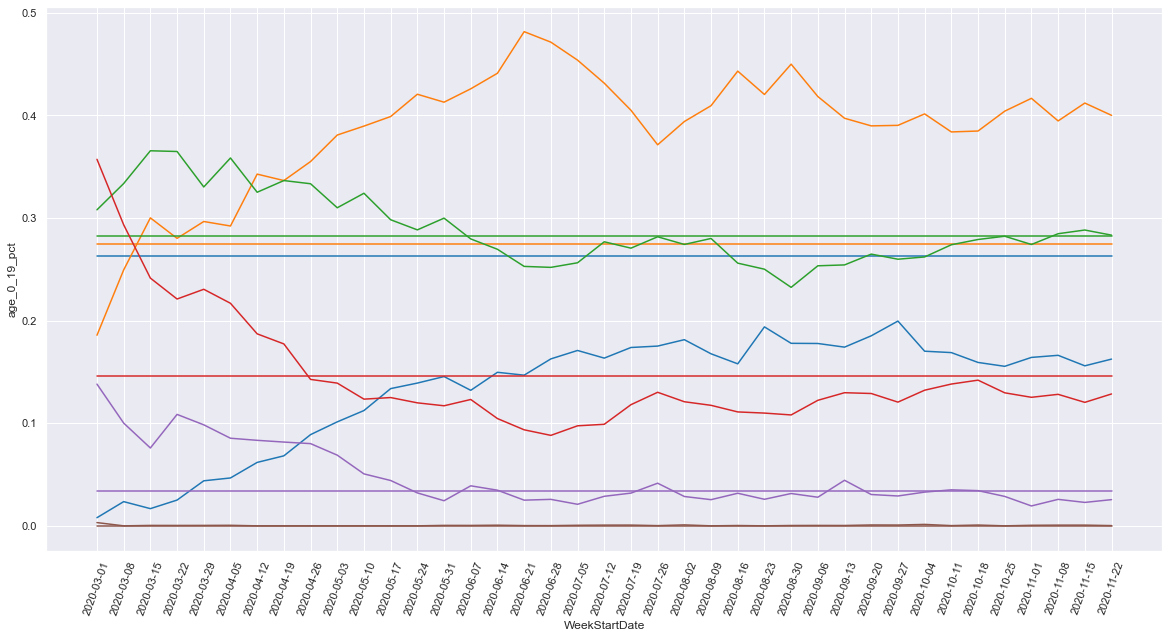

In [24]:
df_tmp = wa_covid_data[wa_covid_data["WeekStartDate"] >= "2020-03-01"]

fig, ax = pyplot.subplots(figsize=(20, 10))
for c in age_columns:
    sns.lineplot(data = df_tmp, x = "WeekStartDate", y = f"{c}_pct",      color = colors[age_columns.index(c)])
    sns.lineplot(data = df_tmp, x = "WeekStartDate", y = f"{c}_baseline", color = colors[age_columns.index(c)])
pyplot.xticks(rotation=70)
pyplot.show()

In [25]:
for c in age_columns:
    wa_covid_data[f"{c}_differential"] = wa_covid_data[f"{c}_pct"] - wa_covid_data[f"{c}_baseline"]

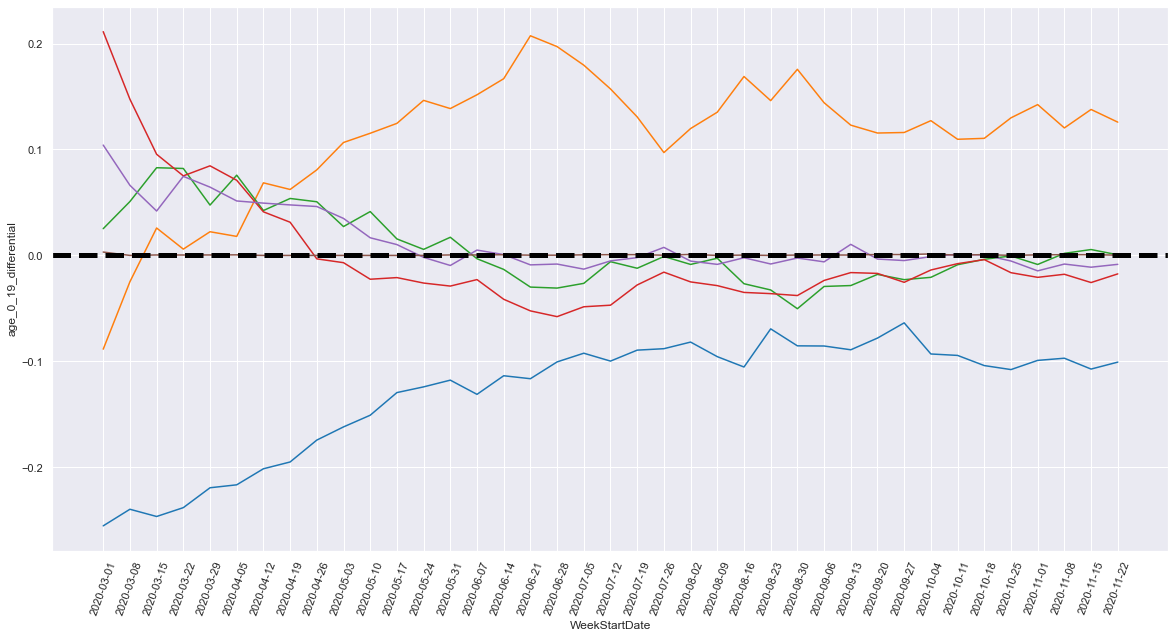

In [34]:
df_tmp = wa_covid_data[wa_covid_data["WeekStartDate"] >= "2020-03-01"]

fig, ax = pyplot.subplots(figsize=(20, 10))
for c in age_columns:
    sns.lineplot(data = df_tmp, x = "WeekStartDate", y = f"{c}_differential",      color = colors[age_columns.index(c)])
ax.axhline(0, color = "black", linewidth = 5, linestyle = "--")
pyplot.xticks(rotation=70)
pyplot.show()

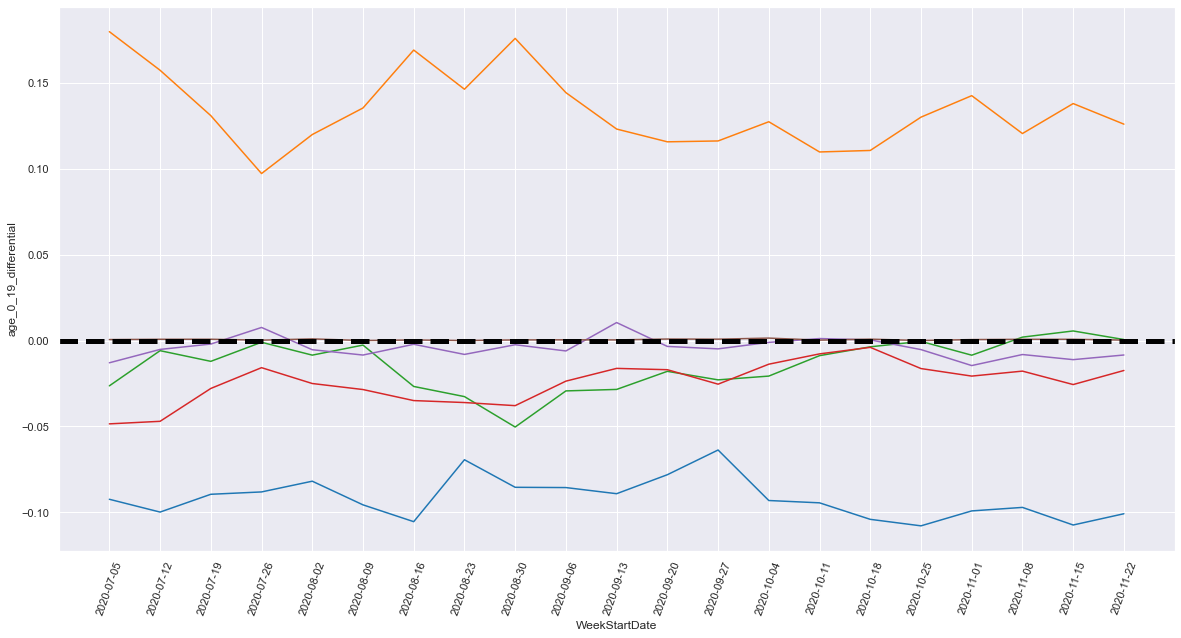

In [35]:
df_tmp = wa_covid_data[wa_covid_data["WeekStartDate"] >= "2020-07-01"]

fig, ax = pyplot.subplots(figsize=(20, 10))
for c in age_columns:
    sns.lineplot(data = df_tmp, x = "WeekStartDate", y = f"{c}_differential",      color = colors[age_columns.index(c)])
ax.axhline(0, color = "black", linewidth = 5, linestyle = "--")
pyplot.xticks(rotation=70)
pyplot.show()